In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import torch

device = torch.device('cpu')

# Augmented Neural ODEs
This notebook contains example of how to train Neural ODEs and Augmented Neural ODEs and to visualize their differences. This includes differences in how they warp the input space, how they generalize and how their ODEs map inputs to features. 

## Create and visualize training data

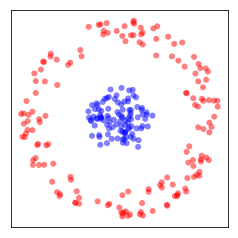

In [67]:
from experiments.dataloaders import ConcentricSphere
from torch.utils.data import DataLoader
from viz.plots import single_feature_plt

# Create training data in 2D, consisting of a concentric disk and an annulus
data_dim = 2
data_concentric = ConcentricSphere(data_dim, inner_range=(0., .5), outer_range=(1., 1.5), 
                                   num_points_inner=1000, num_points_outer=2000)
dataloader = DataLoader(data_concentric, batch_size=64, shuffle=True)

# Visualize a batch of data (use a large batch size for visualization)
dataloader_viz = DataLoader(data_concentric, batch_size=256, shuffle=True)
for inputs, targets in dataloader_viz:
    break

single_feature_plt(inputs, targets)

## Train a Neural ODE

We can now train a Neural ODE on the dataloader we have just created.

#### Set up model

In [79]:
from anode.models import ODENet
from anode.training import Trainer

hidden_dim = 32

model = ODENet(device, data_dim, hidden_dim, time_dependent=True,
               non_linearity='relu')

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [80]:
from viz.plots import get_feature_history

# Set up trainer
trainer = Trainer(model, optimizer, device)
num_epochs = 12

# Optionally record how the features evolve during training
visualize_features = True

if visualize_features:
    feature_history = get_feature_history(trainer, dataloader, inputs,
                                          targets, num_epochs)
else:
    # If we don't record feature evolution, simply train model
    trainer.train(dataloader, num_epochs)


Iteration 0/47
Loss: 0.494
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 10/47
Loss: 0.483
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 20/47
Loss: 0.504
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 30/47
Loss: 0.468
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 40/47
Loss: 0.380
NFE: 20
BNFE: 0
Total NFE: 20
Epoch 1: 0.463

Iteration 0/47
Loss: 0.418
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 10/47
Loss: 0.313
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 20/47
Loss: 0.377
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 30/47
Loss: 0.385
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 40/47
Loss: 0.386
NFE: 20
BNFE: 0
Total NFE: 20
Epoch 1: 0.380

Iteration 0/47
Loss: 0.396
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 10/47
Loss: 0.292
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 20/47
Loss: 0.307
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 30/47
Loss: 0.255
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 40/47
Loss: 0.297
NFE: 20
BNFE: 0
Total NFE: 20
Epoch 1: 0.312

Iteration 0/47
Loss: 0.268
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 10/4

#### Visualize feature evolution

As can be seen, the model struggles to push the blue points out of the red circle.

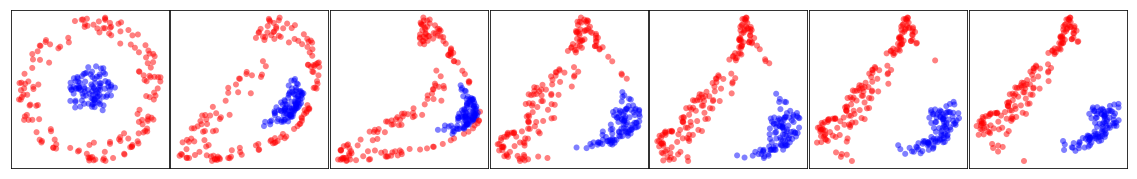

In [81]:
from viz.plots import multi_feature_plt

multi_feature_plt(feature_history[::2], targets)

#### Visualize ODE trajectories
We can also visualize how the trained model maps inputs to features.

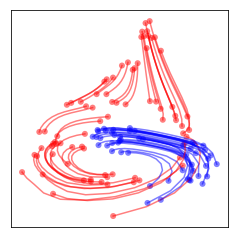

In [82]:
from viz.plots import trajectory_plt

# To make the plot clearer, we will use a smaller batch of data
for small_inputs, small_targets in dataloader:
    break

trajectory_plt(model, small_inputs, small_targets, timesteps=10)

#### Visualize generalization
To see how well the model generalizes we can plot how every point in the input space gets mapped to an output. If a point gets mapped to +1 it will be red, if it gets mapped to -1 it will be blue. 

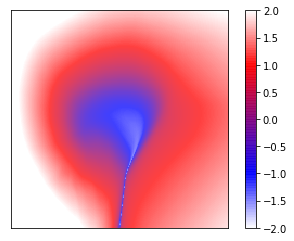

In [83]:
from viz.plots import input_space_plt

input_space_plt(model)

#### Losses and number of function evaluations

Finally we can visualize how the loss and the number of function evaluations (which is proportional to how long a forward pass takes) change during training.

Text(0, 0.5, 'Loss')

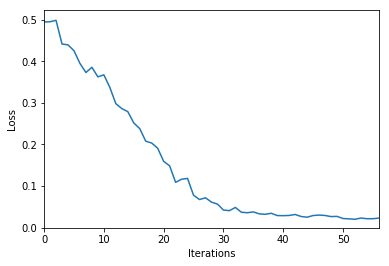

In [84]:
plt.plot(trainer.histories['loss_history'])
plt.xlim(0, len(trainer.histories['loss_history']) - 1)
plt.ylim(0)
plt.xlabel('Iterations')
plt.ylabel('Loss')

Text(0, 0.5, 'NFEs')

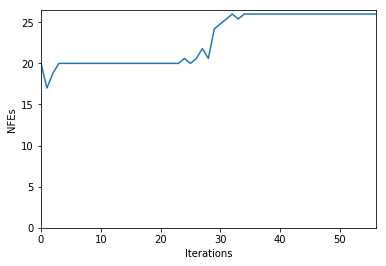

In [85]:
plt.plot(trainer.histories['nfe_history'])
plt.xlim(0, len(trainer.histories['nfe_history']) - 1)
plt.ylim(0)
plt.xlabel('Iterations')
plt.ylabel('NFEs')

## Train an Augmented Neural ODE

As can be seen, the Neural ODE model eventually learns to approximate the function, but does so at the cost of poor generalization and increased computational cost. We will now train an Augmented Neural ODE with one augmented dimension to attempt to mitigate these problems.

In [57]:
# Add 1 augmented dimension
anode = ODENet(device, data_dim, hidden_dim, augment_dim=1,
               time_dependent=True, non_linearity='relu')

optimizer_anode = torch.optim.Adam(anode.parameters(), lr=1e-3)

In [58]:
# Set up trainer
trainer_anode = Trainer(anode, optimizer_anode, device)
num_epochs = 6

# Optionally record how the features evolve during training
visualize_features = True

if visualize_features:
    feature_history = get_feature_history(trainer_anode, dataloader, 
                                          inputs, targets, num_epochs)
else:
    # If we don't record feature evolution, simply train model
    trainer_anode.train(dataloader, num_epochs)


Iteration 0/47
Loss: 0.549
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 10/47
Loss: 0.476
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 20/47
Loss: 0.443
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 30/47
Loss: 0.460
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 40/47
Loss: 0.459
NFE: 20
BNFE: 0
Total NFE: 20
Epoch 1: 0.482

Iteration 0/47
Loss: 0.433
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 10/47
Loss: 0.377
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 20/47
Loss: 0.334
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 30/47
Loss: 0.350
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 40/47
Loss: 0.175
NFE: 20
BNFE: 0
Total NFE: 20
Epoch 1: 0.319

Iteration 0/47
Loss: 0.218
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 10/47
Loss: 0.160
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 20/47
Loss: 0.158
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 30/47
Loss: 0.079
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 40/47
Loss: 0.050
NFE: 20
BNFE: 0
Total NFE: 20
Epoch 1: 0.121

Iteration 0/47
Loss: 0.032
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 10/4

#### Visualize feature evolution
As can be seen, the model lifts out the disk from the surrouding annulus by going into the augmented dimension.

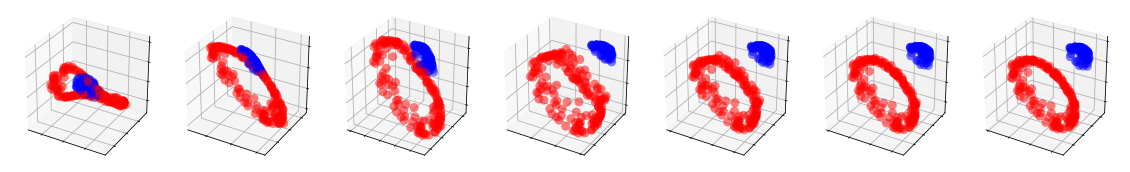

In [59]:
from viz.plots import multi_feature_plt

multi_feature_plt(feature_history, targets)

#### Visualize ODE trajectories

We can visualize how the augmented model maps inputs to features.

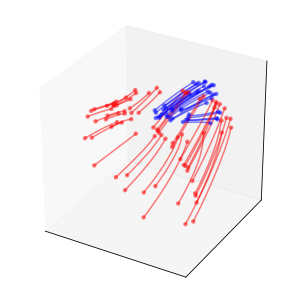

In [60]:
from viz.plots import trajectory_plt

trajectory_plt(anode, small_inputs, small_targets, timesteps=10)

#### Visualize generalization
As can be seen, the model generalizes well and has captured the shape of the data.

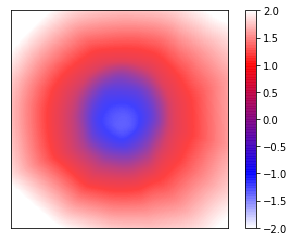

In [61]:
from viz.plots import input_space_plt

input_space_plt(anode)

#### Visualize losses and NFEs

As can be seen, the Augmented Neural ODE model achieves low losses and low NFEs. This suggests it has learned to model the data with a simple flow that is easy to compute.

Text(0, 0.5, 'Loss')

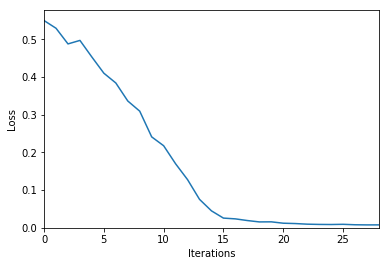

In [62]:
plt.plot(trainer_anode.histories['loss_history'])
plt.xlim(0, len(trainer_anode.histories['loss_history']) - 1)
plt.ylim(0)
plt.xlabel('Iterations')
plt.ylabel('Loss')

Text(0, 0.5, 'NFEs')

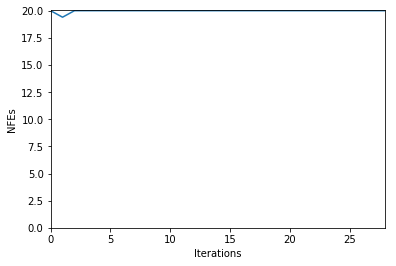

In [66]:
plt.plot(trainer_anode.histories['nfe_history'])
plt.xlim(0, len(trainer_anode.histories['nfe_history']) - 1)
plt.ylim(0)
plt.xlabel('Iterations')
plt.ylabel('NFEs')